# 函数引用

函数与变量一样，也有id

函数名仅仅是一个变量，指向了定义的函数

## 函数名是变量 

In [4]:
def test1():
    print(" ---- in  test1 func -----")

    
# 调用函数
test1()
#  引用函数
ret = test1  # 注意没有()
# 同一个函数
ret,test1

 ---- in  test1 func -----


(<function __main__.test1()>, <function __main__.test1()>)

In [5]:
# id相同--引用
id(test1), id(ret)

(2172888126512, 2172888126512)

In [8]:
# 调用函数--运行的也是test1
ret()

 ---- in  test1 func -----


## 指向其他函数

In [50]:
def foo():
    print("---- in foo----")
foo

<function __main__.foo()>

In [51]:
foo()

---- in foo----


In [53]:
# foo指向了其他函数
foo = test1
foo

<function __main__.test1()>

In [54]:
foo()

-----test1  x : 200-----


<function __main__.test1.<locals>.test1_in()>

# 闭包

闭包的使用：
    
    1.全局变量可以被任意其他函数修改，不安全
    2.装饰器中需要使用闭包,提高代码可复用性
    
什么是闭包？

    函数内部再定义一个函数时，内部的函数用到了外部函数的变量，将这个函数以及其用到的外部函数变量称为闭包
    因此在涉及嵌套函数时，由于函数之间变量的使用会存在闭包的问题

## 全局变量的问题--为什么需要闭包

### 变量作用域规则

In [14]:
def f1(a):
    # 函数内定义了一个局部变量a
    print(a)
    # 尝试打印一个变量b，由于函数没有定义它，会认为这是一个全局变量
    try:
        print(b)  # 函数内未定义b
    except Exception as e:
        print(e)
    
f1(666)

666
name 'b' is not defined


In [15]:
b = 6
def f2(a):
    print(a)
    print(b)  # b被视为全局变量

    
f2(666)

666
6


python不要求声明变量，但是假定在函数定义体中**赋值**的变量是局部变量

In [18]:
b = 6
def f3(a):
    print(a)
    # 尝试打印一个变量b，由于函数在后面定义它，会认为这是一个局部变量
    try:
        print(b)  # 在定义之前调用会报错--b已经被认为是局部变量
    except Exception as e:
        print(e)
    # 导致python判断这是一个局部变量    
    b = 999
    
f3(666)

666
local variable 'b' referenced before assignment


### 正确使用全局变量

如果在函数中赋值时想让解释器把 b 当成全局变量，要使用` global` 声明

In [22]:
b = 6
def f4(a):
    print(a)
    global b  # b被认为是全局变量
    print(b)
    b = 999
    
f4(666)
print(b)

666
6
999


dis 模块为反汇编 Python 函数字节码提供了简单的方式

使用dis可以追踪变量类型

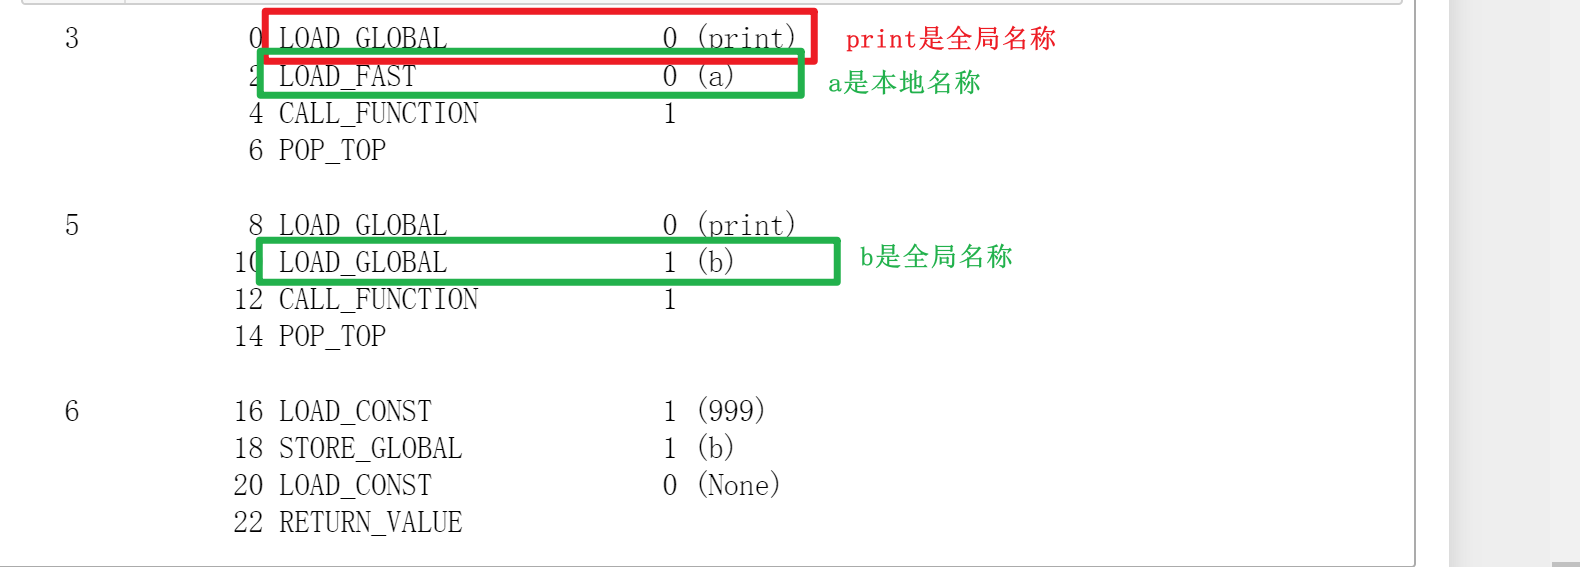

In [21]:
from dis import dis
dis(f4)

  3           0 LOAD_GLOBAL              0 (print)
              2 LOAD_FAST                0 (a)
              4 CALL_FUNCTION            1
              6 POP_TOP

  5           8 LOAD_GLOBAL              0 (print)
             10 LOAD_GLOBAL              1 (b)
             12 CALL_FUNCTION            1
             14 POP_TOP

  6          16 LOAD_CONST               1 (999)
             18 STORE_GLOBAL             1 (b)
             20 LOAD_CONST               0 (None)
             22 RETURN_VALUE


## 闭包示例

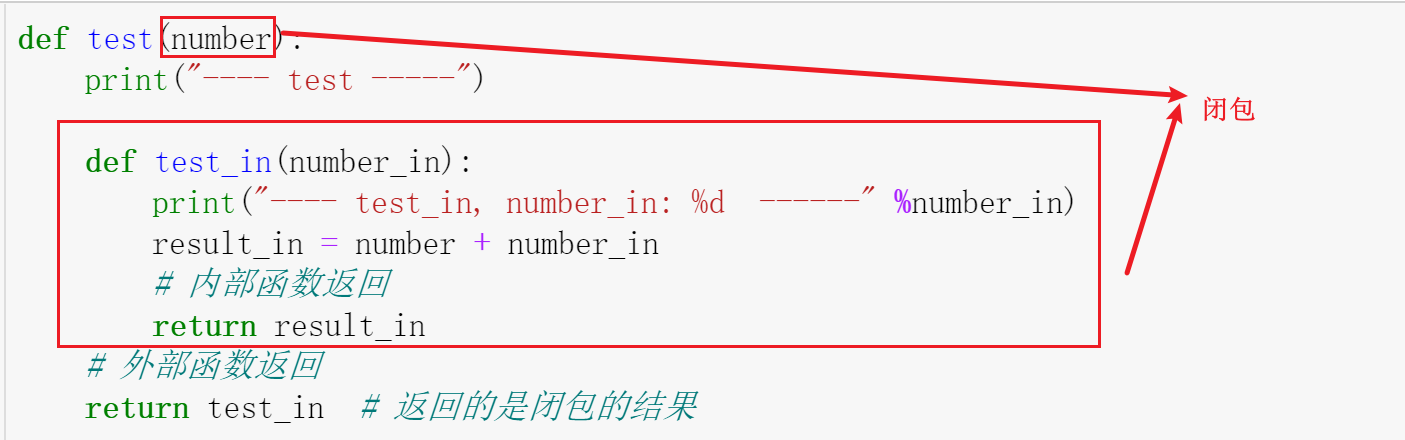

In [9]:
def test(number):
    print("---- test -----")
    
    def test_in(number_in):
        print("---- test_in, number_in: %d  ------" %number_in)
        result_in = number + number_in
        # 内部函数返回
        return result_in
    # 外部函数返回
    return test_in  # 返回的是闭包的结果

In [10]:
# 调用外部函数:外部函数传参初始化，创建闭包
ret = test(20)  # 返回闭包

---- test -----


In [12]:
# 调用内部函数
ret(100)

---- test_in, number_in: 100


120

In [14]:
# 调用内部函数
ret(200)

---- test_in, number_in: 200


220

## 闭包与自由变量--闭包分析

**闭包引用了外部函数的局部变量**

对于下列嵌套函数：
    函数内的内部函数average()与函数中的局部变量series是什么关系？

In [26]:
def make_averager():
    """
    :return averager:返回定义的内部函数对象
    
    """
    # make_averager的局部变量
    series = []  # 与averager有何关系？
    def averager(new_value):# 不断加入的新值需要更新全局的平均值
        # 内部函数使用外部函数的局部变量
        series.append(new_value)  # 将新值加入全局
        # 更新全局的平均值
        total = sum(series)
        return total /len(series)  # 返回均值
    
    return averager  # 注意返回的是内部函数

In [27]:
# 调用 make_averager 时，返回一个 内部函数对象(averager 函数对象)
avg = make_averager()
# 通过avg可以调用make_averager的内部函数对象averager
avg(10) # averager返回的是均值

10.0

分析：

    # 调用 make_averager 时，返回一个 内部函数对象(averager 函数对象)
    avg = make_averager()
    
上述说明，上述语句结束后，make_averager已经结束了，因为它已经return了其返回值(内部函数对象averager)

因此，既然函数已经返回结束了，make_averager的局部变量series也应该清空了才对

但是avg(也就是内部函数对象averager)却可以对series时刻保留历史值从而进行计算，这是为啥？

**原因**

series是averager的**自由变量**(未在本地作用域中绑定的变量)，

定义averager函数时自由变量的**绑定**会被保存起来，因此调用make_averager函数时虽然定义作用域不可用了，但是仍能使用**绑定**。

绑定存储在闭包中？__closure__存储了自由变量的绑定
    

In [29]:
# 观察averager函数的局部变量
avg.__code__.co_varnames   # 说明new_value、total是局部变量

('new_value', 'total')

In [30]:
# 观察averager函数的自由变量
avg.__code__.co_freevars  # 说明series是自由变量

('series',)

In [31]:
# 看自由变量的绑定--__closure__的元素
avg.__closure__  # __closure__的元素(cell对象)与co_freevars(自由变量)的名称一一对应

(<cell at 0x0000023C2A1B4D00: list object at 0x0000023C2CD13D40>,)

In [32]:
# cell_contents保存了自由变量的值
avg.__closure__[0].cell_contents  # avg.__closure__[0]-->avg只含一个绑定

[10]

In [33]:
# 随着更新，值不会清空
avg(11)
avg.__closure__[0].cell_contents

[10, 11]

闭包引用了外部函数的局部变量，故外部函数的局部变量没有及时释放，消耗内存

### 自由变量声明：nonlocal

In [22]:
# 内部函数直接修改外部函数的局部变量(自由变量)，会报错

def test1():
    x = 200
    print("-----test1  x : %d-----"%x)
    
    def test1_in():
        try:
            # 2.由于被误认为是后面定义的局部变量,这里会报错
            print("-----test1 in before change x : %d-----"%x)
        except Exception as e:
            print(e)
            
        x = 3000  # 1.与之前类似，这里会让python误以为这是一个局部变量
        print("-----test1 in after change x : %d-----"%x)

    return test1_in

ret1 =test1()
ret1()

-----test1  x : 200-----
local variable 'x' referenced before assignment
-----test1 in after change x : 3000-----


In [25]:
# 显示的添加一个自由变量声明

def test1():
    x = 200
    print("-----test1  x : %d-----"%x)
    
    def test1_in():
        # 自由变量声明
        nonlocal x
        print("-----test1 in before change x : %d-----"%x) 
        x = 3000  # 修改自由变量
        print("-----test1 in after change x : %d-----"%x)

    return test1_in

ret1 =test1()
ret1()

-----test1  x : 200-----
-----test1 in before change x : 200-----
-----test1 in after change x : 3000-----


#### 细节

对于不可变数据类型：数字、字符串、元组等,+=也会隐式的创建局部变量

In [29]:
# 内部函数直接修改外部函数的局部变量(自由变量)，会报错

def test1():
    x = 200
    print("-----test1  x : %d-----"%x)
    
    def test1_in():
        try:
            # 2.由于被误认为是后面定义的局部变量,这里会报错
            print("-----test1 in before change x : %d-----"%x)
            # 1.与之前类似，这里会让python误以为这是一个局部变量 
            x += 3000  # ==> x = x + 3000
            print("-----test1 in after change x : %d-----"%x)
        except Exception as e:
            print(e)
    return test1_in

ret1 =test1()
ret1()

-----test1  x : 200-----
local variable 'x' referenced before assignment


可变类型+=实际上是extend()成员函数的调用，不会隐式创建局部变量。

**但是在闭包中好像也不能使用，需要使用extend()方法**


In [42]:
def make_averager():
    """
    :return averager:返回定义的内部函数对象
    
    """
    # make_averager的局部变量
    series = []  # 与averager有何关系？
    def averager(new_value):# 不断加入的新值需要更新全局的平均值
        # 内部函数使用外部函数的局部变量
        series.extend([new_value])
        # 更新全局的平均值
        total = sum(series)
        return total /len(series)  # 返回均值
    
    return averager  # 注意返回的是内部函数


avg = make_averager()
avg(30)

30.0

In [48]:
def make_averager():
    """
    :return averager:返回定义的内部函数对象
    
    """
    # make_averager的局部变量
    series = []  # 与averager有何关系？
    def averager(new_value):# 不断加入的新值需要更新全局的平均值
        # 内部函数使用外部函数的局部变量
        try:
            series += [new_value]
            # 更新全局的平均值
            total = sum(series)
            return total /len(series)  # 返回均值
        except Exception as e:
            print(e)
    return averager  # 注意返回的是内部函数


avg = make_averager()
avg(30)

local variable 'series' referenced before assignment


# 函数装饰器

装饰器作用：

    实现代码设计的开放封闭原则
    
    
**功能1:验证**
为多个功能函数f1，f2，f3，f4实现验证:
    
    def valid_func(func): # func是功能函数
        def inner():  
         # 扩展的验证
         # valid1
         # valid2
         # valid3
         func() # 实现函数功能
       return inner
     
     @valid_func
     def f1():
         # f1自身的功能代码    
     @valid_func
     def f2():
         # f2自身的功能代码 
     @valid_func
     def f3():
         # f3自身的功能代码
     @valid_func
     def f4():
         # f4自身的功能代码

扩展的功能由外部的valid_func函数实现，不允许在f1，f2，f3，f4内部修改
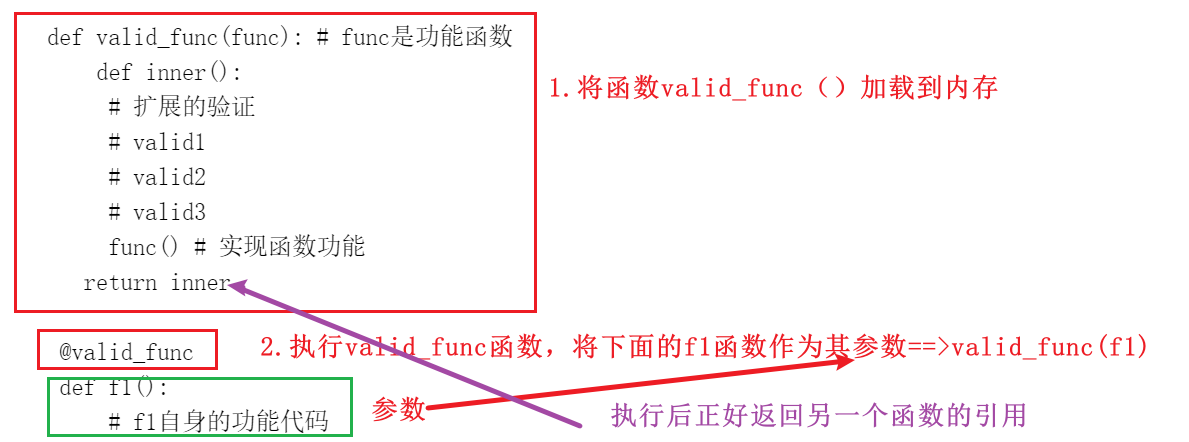

因此就是实现了函数名引用的修改

**从闭包理解装饰器的返回**

    @valid_func
     def f1():
         # f1自身的功能代码
上述相当于f1 = valid_func(f1)的函数调用，调用此函数会return inner-->返回一个函数引用inner并赋值给f1，因此f1指向了新的函数引用。
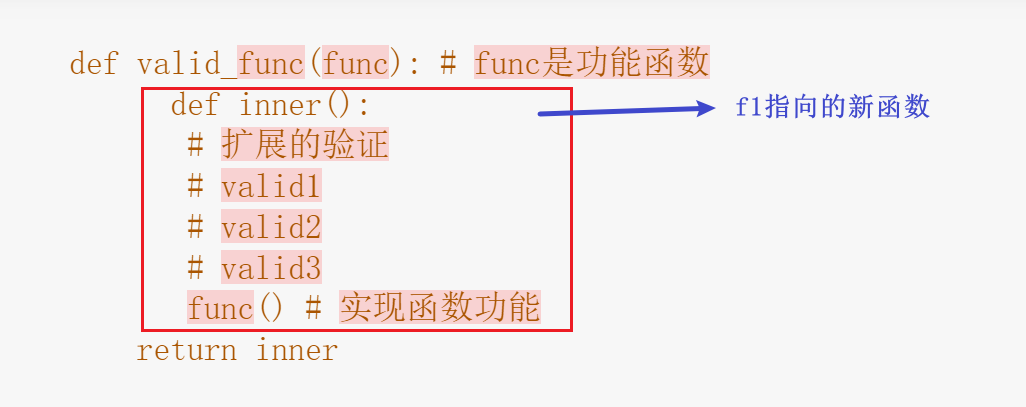

f1是外层函数valid_func的局部变量--因此内层函数使用f1时，f1相当于inner的自由变量。
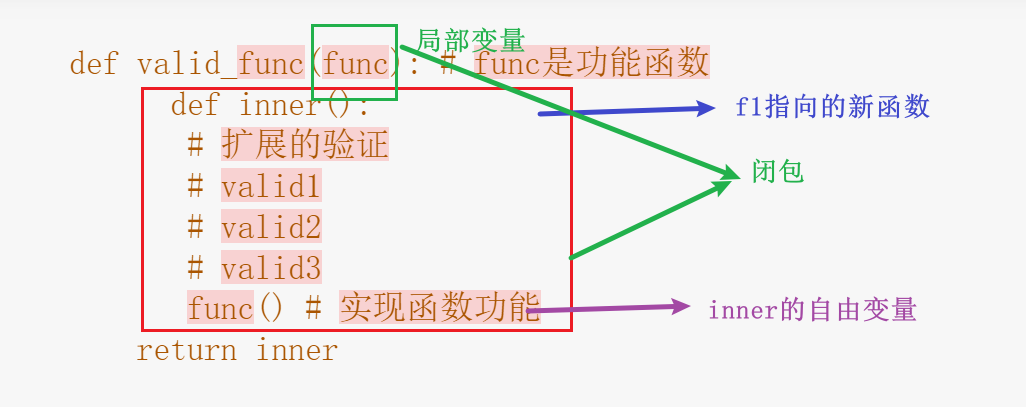
所以f1 = valid_func(f1)调用结束后，f1还没被释放，inner还持有f1的引用。之后调用f1等价于调用inner()【新f1】,而在inner内部执行的f1()【func】是旧f1

### 装饰器实际上就是函数引用修改

In [72]:
# 定义一个名为deco的装饰器
def deco(func):#其参数是一个函数(被装饰的函数)
    print("----in deco -----") # 在装饰函数时就执行
    # 定义了一个函数内的函数并返回，此函数会替换被装饰的函数
    def inner():
        print("inner running")
    return inner

# 定义被装饰的函数
def target():
    print("target running")

In [73]:
# 用法1--执行内部函数和外部函数之间的内容
# 说明实际上就是函数引用的修改
target = deco(target)  # 执行deco函数，返回一个函数引用并赋值给target

----in deco -----


In [74]:
# target已经被改变了，执行了新的函数定义（也就是inner函数）
target()  # 执行内部函数的内容

inner running


In [76]:
# 引用了inner函数
target

<function __main__.deco.<locals>.inner()>

In [9]:
# 用法2
@deco  # -->执行target = deco(target)
def target():# 被装饰的函数
    print("target running")

target()

inner running


## 装饰器的参数问题--闭包自由变量问题

**从闭包理解装饰器的返回**

    @valid_func
     def f1():
         # f1自身的功能代码
上述相当于f1 = valid_func(f1)的函数调用，调用此函数会return inner-->返回一个函数引用inner并赋值给f1，因此f1指向了新的函数引用。
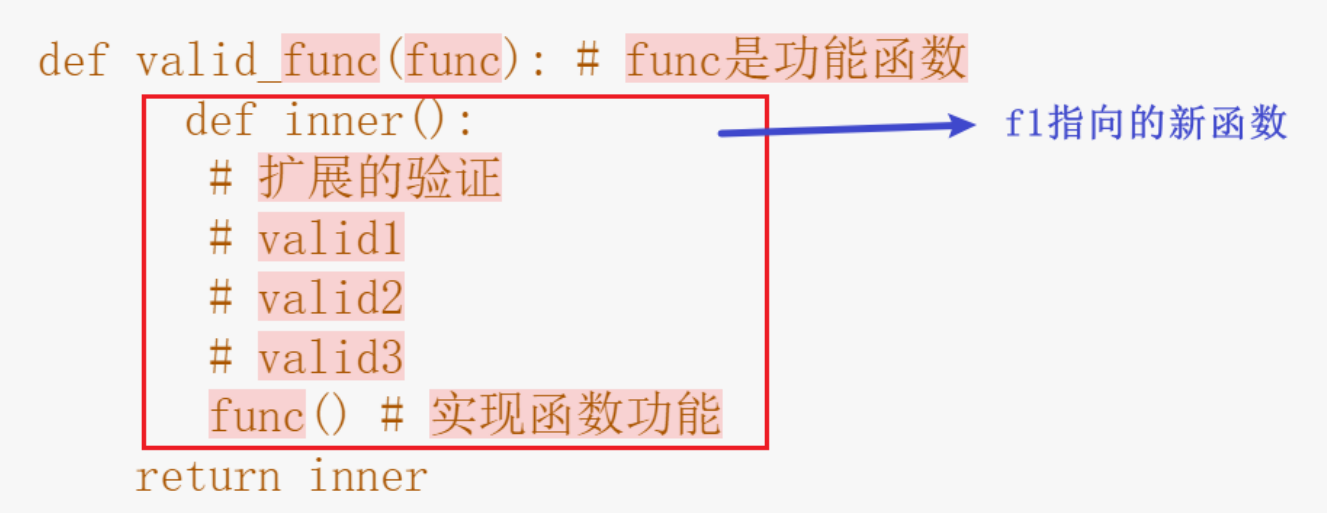

f1是外层函数valid_func的局部变量--因此内层函数使用f1时，f1相当于inner的自由变量。
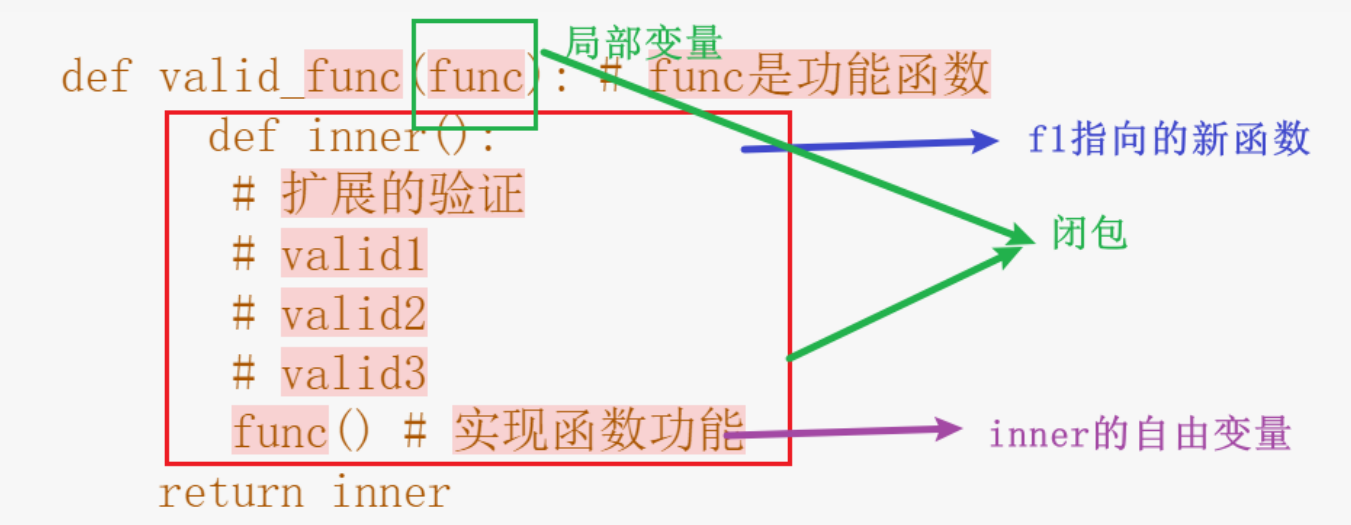
所以f1 = valid_func(f1)调用结束后，f1还没被释放，inner还持有f1的引用。之后调用f1等价于调用inner()【新f1】,而在inner内部执行的f1()【func】是旧f1

### 装饰器除func外无其他参数--只要一个自由变量func

In [66]:
def valid_func(func):
    print("---- valid func decorate ----")
    def inner():
        print(" ---- inner func ----")
        func() # 自由变量func
    return inner

@valid_func
def f1():
    print("----- func1------ ")
      
f1()

---- valid func decorate ----
 ---- inner func ----
----- func1------ 


In [69]:
# 说明func是f1（也就是inner）的自由变量
f1.__code__.co_freevars

('func',)

In [77]:
f1.__closure__,f1.__closure__[0].cell_contents

((<cell at 0x000001F9EB9561C0: function object at 0x000001F9EC9CCD30>,),
 <function __main__.f1()>)

### 被装饰的函数有参数

In [84]:
def valid_func(func):
    print("---- valid func decorate ----")
    def inner(a,b):  # func的参数也会传给inner
        print(" ---- inner func: a:%d b:%d ----"%(a , b))
        func(a,b) # 自由变量func(旧f1)包含参数
    return inner

@valid_func
def f1(a,b):
    print("----- func1: a + b = %d ----"%(a + b))

# 由于f1实际上指向了inner，因此此处传的参数会给inner
f1(3,5)

---- valid func decorate ----
 ---- inner func: a:3 b:5 ----
----- func1: a + b = 8 ----


### 被装饰的函数有不定长参数

## 语法点

综合上述分析，语法点如下：
    
    1. 装饰器@valid_func(装饰func)在func()调用前就已经被python解释器执行了(也就是把func装饰好了)
    2.@函数名是python的一种语法糖

函数装饰器是`可调用对象`，参数是`一个函数(被装饰的函数)`能把被装饰的函数替换成其他函数,或者处理被装饰的函数

    大多是装饰器会在 内部定义一个函数然后将其返回--替换被装饰的函数
    定义装饰器和定义被装饰的函数可以不在同一个模块中。通常在一个模块中定义装饰器，在其他模块中定义函数

装饰器在**加载模块时**立即执行:在被装饰的函数定义之后立即执行(无论是否被调用)

**注意区分导入时和运行时**

    导入时:import模块
    运行时:main()函数调用

下列代码将装饰器修饰的函数进行处理(存储在一个列表中)，而不是将装饰器函数进行替换
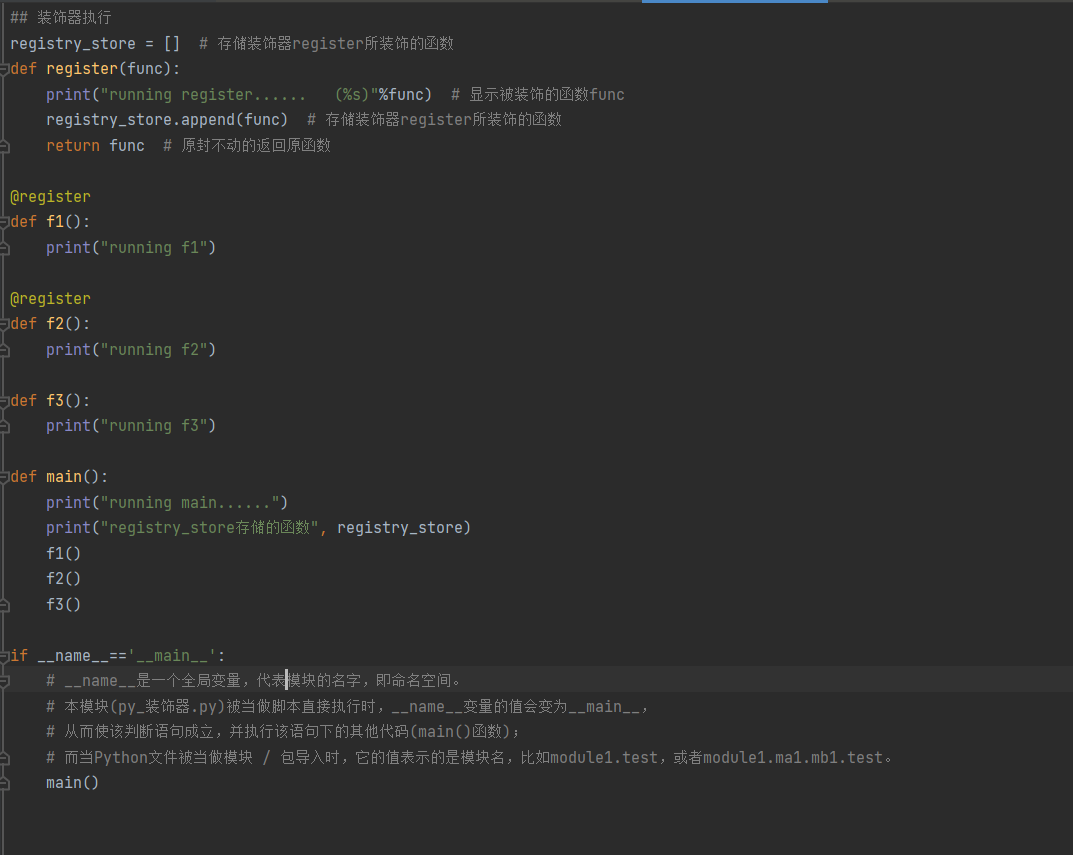
上述代码作为**脚本文件**运行时，会打印导入时的内容+运行时main()的内容

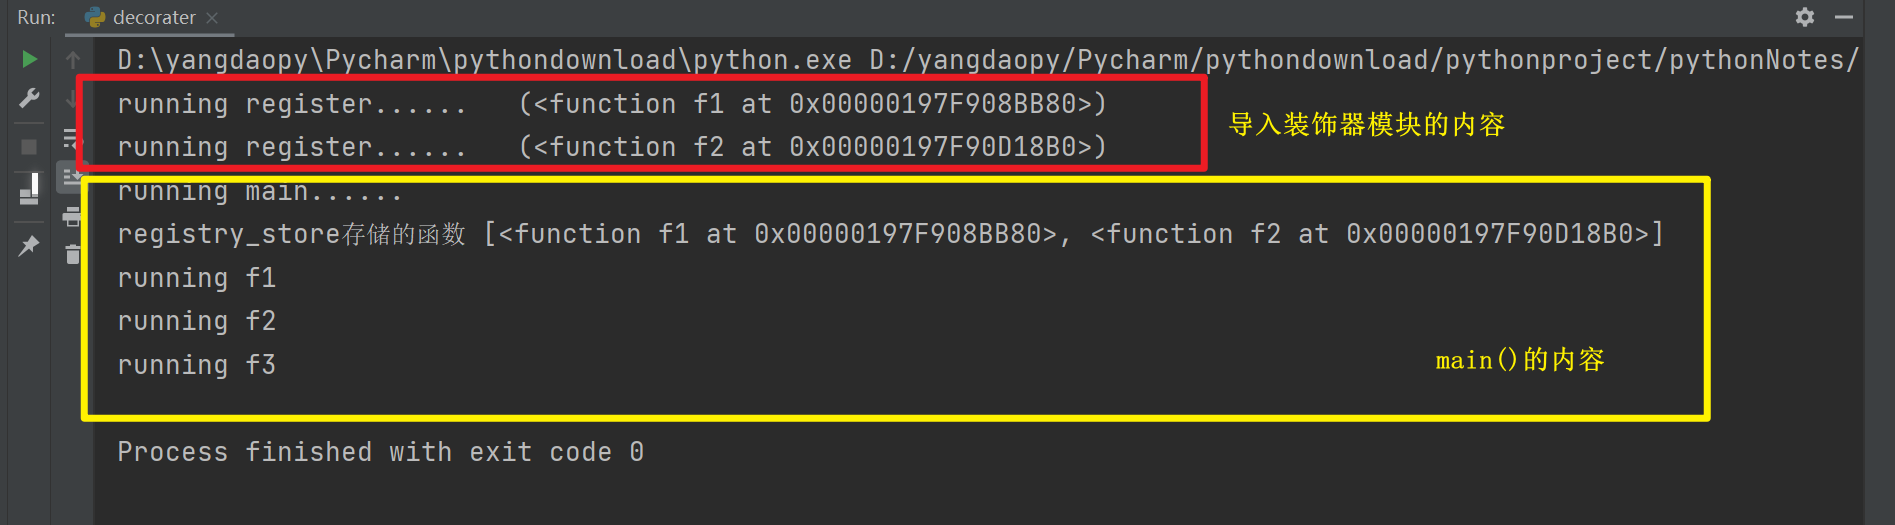

而作为模块导入时只会打印导入时的内容
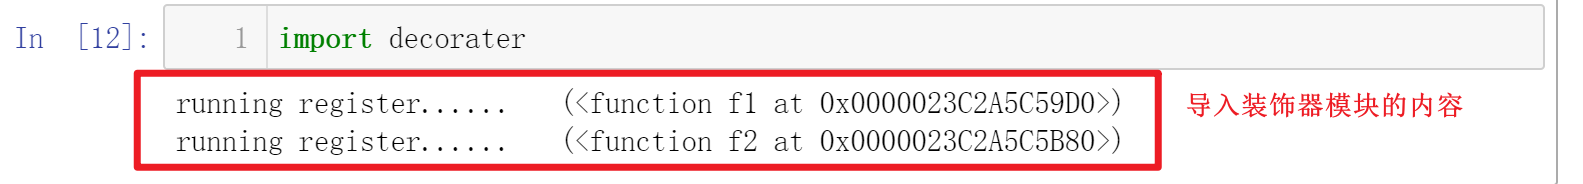

In [12]:
import decorater

running register......   (<function f1 at 0x0000023C2A5C59D0>)
running register......   (<function f2 at 0x0000023C2A5C5B80>)


## 多个装饰器装饰同一函数

上述验证功能可能不是一次全部添加的，可能时陆续扩展进来的
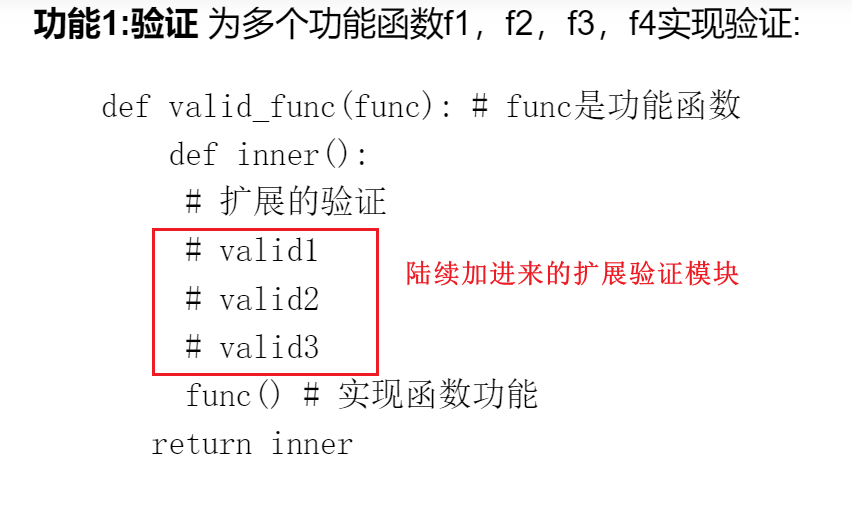

In [63]:
def valid_first(func):
    print("--- first valid decorater---")  # 装饰权限1
    def call_func(*args, **kwargs):
        print("-----  first valid----")   # 扩展的权限1验证
        return func(*args, **kwargs)    #  功能函数
    return call_func


def valid_second(func):
    print("--- second valid decorater ---")# 装饰权限2
    def call_func(*args, **kwargs):
        print("---- second vaild ----")# 扩展的权限2验证
        return func(*args, **kwargs)#  功能函数
    return call_func

多个装饰器装饰func时谁先执行？

In [64]:
@valid_first
@valid_second
def test1():
    print("----- func -----")
    

--- second valid decorater ---
--- first valid decorater---


可见，外层装饰是由内到外进行装饰

In [65]:
test1()

-----  first valid----
---- second vaild ----
----- func -----


可见执行是由外而内执行